In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from re import search
import os
!pwd

/Users/amotahari/git-repo/MVCNN-PyTorch-Airways


In [88]:
inputFileName = '../../qsubout/Airways_Torch.o607310'
logfile = open(inputFileName,"r")
lines = logfile.readlines()
logfile.close()

In [89]:
loss = []
Val_Acc = []
Val_Loss = []

for n, l in enumerate(lines):
    if ('Epoch' in l) and ('Epoch: [1/' not in l):
        epoch_loss = []
        for i in lines[n+1:n+7]:
            #print(i)
            epoch_loss.append(float(i[20:26]))
        loss.append(np.mean(epoch_loss))
        try:
            if 'Val' in (lines[n+10]):
                Val_Acc.append(float(lines[n+10][10:15]))
                #print(lines[n+10][24:30])
                Val_Loss.append(float(lines[n+10][24:30]))
            else:
                if Val_Acc != []:
                    Val_Acc.append(Val_Acc[-1])
                    Val_Loss.append(Val_Loss[-1])
        except:
            pass
        

        
    if 'Val Acc' in l:
        #print(l)
        pass
    


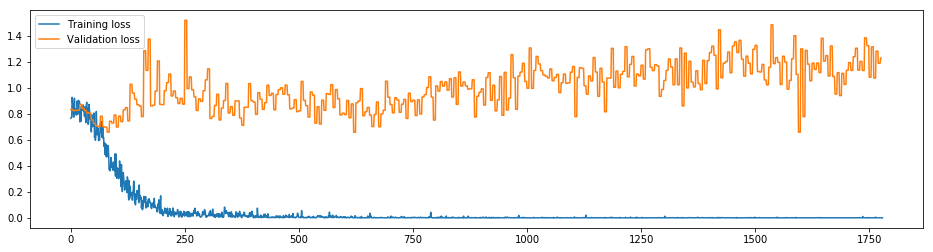

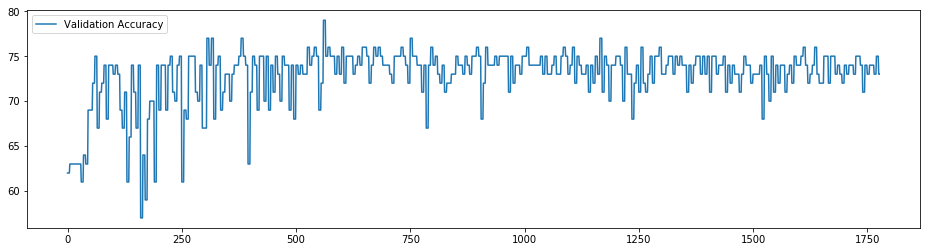

In [96]:
fig = plt.figure(figsize=(16,4))
plt.plot(loss,label='Training loss')
plt.plot(Val_Loss,label='Validation loss')
plt.legend()
fig.savefig('Loss.png')
fig = plt.figure(figsize=(16,4))
plt.plot(Val_Acc,label='Validation Accuracy')
plt.legend(loc='upper left')

fig.savefig('Validation_Accuracy.png')


In [ ]:
N = range(len(loss)-1)
plt.figure(figsize=(16,4))
plt.scatter(range(len(loss)),loss,s=1)
plt.scatter(range(len(Val_Loss)),Val_Loss,s=1)
plt.figure(figsize=(16,4))
plt.plot(Val_Acc)